<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/Gorev_9_Mert_G%C3%BCney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GÖREV 9:**

**Bulduğunuz bir veri seti ile regresyon modeli geliştirin ve değerlendirin. (titanic, iris, taxis ve çok kullanılan bir veri seti olmayacak)**

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv("deprem_son24saat_duzenli.csv")
df

,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk,Yer
0,2025.04.23 13:01:02,40.8427,28.3802,21.3,4.3,MARMARA DENIZI
1,2025.04.23 13:02:32,40.8640,28.4223,18.7,5.2,MARMARA DENIZI
2,2025.04.23 13:05:43,40.8213,28.2977,12.3,3.3,MARMARA DENIZI
3,2025.04.23 13:06:59,40.8662,28.4270,22.9,3.6,MARMARA DENIZI
4,2025.04.23 13:07:30,40.8252,28.3233,11.0,3.3,MARMARA DENIZI
...,...,...,...,...,...,...
284,2025.04.24 09:22:08,40.8380,28.1362,19.0,3.3,MARMARA DENIZI
285,2025.04.24 10:07:40,40.8397,28.3910,17.0,2.9,MARMARA DENIZI
286,2025.04.24 10:12:47,36.6740,25.7035,12.8,3.1,EGE DENIZI
287,2025.04.24 12:03:37,40.8603,28.4188,16.0,2.7,MARMARA DENIZI


In [101]:
df.head()

,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk,Yer
0,2025.04.23 13:01:02,40.8427,28.3802,21.3,4.3,MARMARA DENIZI
1,2025.04.23 13:02:32,40.8640,28.4223,18.7,5.2,MARMARA DENIZI
2,2025.04.23 13:05:43,40.8213,28.2977,12.3,3.3,MARMARA DENIZI
3,2025.04.23 13:06:59,40.8662,28.4270,22.9,3.6,MARMARA DENIZI
4,2025.04.23 13:07:30,40.8252,28.3233,11.0,3.3,MARMARA DENIZI


In [102]:
df['Olus_Zamani'] = pd.to_datetime(df['Olus_Zamani'], errors='coerce') # Datetime'a çevirdim. Eğer hatalı değer varsa NaT yapar.

In [103]:
df.isnull().sum()

,0
Olus_Zamani,0
Enlem,0
Boylam,0
Derinlik_km,0
Buyukluk,0
Yer,0


In [104]:
df.describe() # Sayısal özelliklilerin istatiği.

,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk
count,289,289.000000,289.000000,289.000000,289.000000
mean,2025-04-23 20:05:35.768166144,40.676970,28.502753,14.656747,2.446713
min,2025-04-23 13:01:02,35.756200,25.668000,1.200000,1.200000
25%,2025-04-23 15:12:57,40.839300,28.305300,11.500000,1.900000
50%,2025-04-23 18:51:26,40.850800,28.381800,14.300000,2.300000
75%,2025-04-23 23:47:21,40.862500,28.419300,19.500000,2.900000
max,2025-04-24 12:06:39,40.991500,40.216000,29.600000,5.200000
std,NaN,0.721588,1.301043,5.984137,0.706073


In [105]:
df

,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk,Yer
0,2025-04-23 13:01:02,40.8427,28.3802,21.3,4.3,MARMARA DENIZI
1,2025-04-23 13:02:32,40.8640,28.4223,18.7,5.2,MARMARA DENIZI
2,2025-04-23 13:05:43,40.8213,28.2977,12.3,3.3,MARMARA DENIZI
3,2025-04-23 13:06:59,40.8662,28.4270,22.9,3.6,MARMARA DENIZI
4,2025-04-23 13:07:30,40.8252,28.3233,11.0,3.3,MARMARA DENIZI
...,...,...,...,...,...,...
284,2025-04-24 09:22:08,40.8380,28.1362,19.0,3.3,MARMARA DENIZI
285,2025-04-24 10:07:40,40.8397,28.3910,17.0,2.9,MARMARA DENIZI
286,2025-04-24 10:12:47,36.6740,25.7035,12.8,3.1,EGE DENIZI
287,2025-04-24 12:03:37,40.8603,28.4188,16.0,2.7,MARMARA DENIZI


In [106]:
df['Saat'] = df['Olus_Zamani'].dt.hour
df['Gun'] = df['Olus_Zamani'].dt.day
# Saat ve Gün bilgilerini çıkardım.

In [127]:
df['Ana_Yer'] = df['Yer'].apply(lambda x: 'MARMARA' if 'MARMARA' in x else 'DIGER') # Bu kod parçasını chatgpt'den aldım, yer bilgisini basitleştireceği için işimize yarar.(Sadece Marmara Denizi ve diğerleri)

In [108]:
df = df[df['Buyukluk'] > 1.5]

In [153]:
def derinlik_kategori(derinlik): # Sonradan model score'umu arttırmak için düzenlemeler yaptım.
    if derinlik <= 10:
        return 'sig'
    elif derinlik <= 30:
        return 'orta'
    else:
        return 'derin'

In [128]:
df['Derinlik_Seviyesi'] = df['Derinlik_km'].apply(derinlik_kategori)

In [129]:
df = pd.get_dummies(df, columns=['Ana_Yer', 'Derinlik_Seviyesi'])

In [112]:
df.columns

Index(['Olus_Zamani', 'Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk', 'Yer',
       'Saat', 'Gun', 'Ana_Yer_DIGER', 'Ana_Yer_MARMARA',
       'Derinlik_Seviyesi_orta', 'Derinlik_Seviyesi_sig'],
      dtype='object')

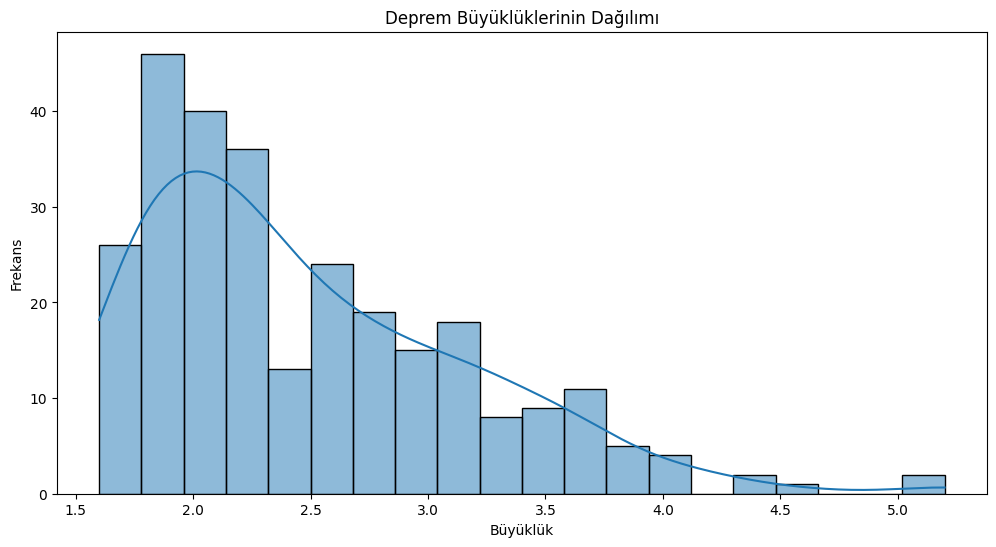

In [130]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Buyukluk'], bins=20, kde=True)
plt.title('Deprem Büyüklüklerinin Dağılımı')
plt.xlabel('Büyüklük')
plt.ylabel('Frekans')
plt.show()

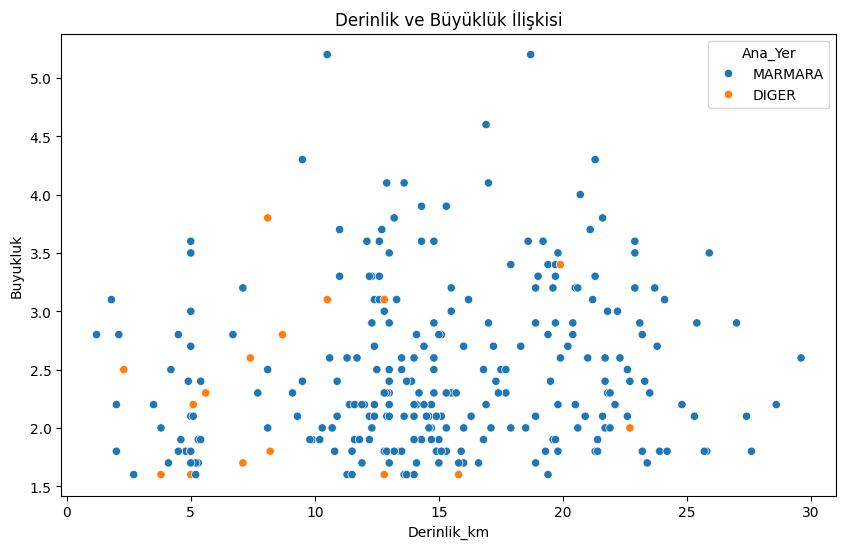

In [131]:
df['Ana_Yer'] = df['Yer'].apply(lambda x: 'MARMARA' if 'MARMARA' in x else 'DIGER')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Derinlik_km', y='Buyukluk', data=df, hue='Ana_Yer')
plt.title('Derinlik ve Büyüklük İlişkisi')
plt.show()

In [116]:
df.columns

Index(['Olus_Zamani', 'Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk', 'Yer',
       'Saat', 'Gun', 'Ana_Yer_DIGER', 'Ana_Yer_MARMARA',
       'Derinlik_Seviyesi_orta', 'Derinlik_Seviyesi_sig', 'Ana_Yer'],
      dtype='object')

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)

In [137]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [138]:
MAE = mean_absolute_error(y_test, y_pred)
print("Ortalama Mutlak Hata (MAE):", MAE)
MSE = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata (MSE):", MSE)
RMSE = np.sqrt(MSE)
print("Kök Ortalama Kare Hata (RMSE):", RMSE)

Ortalama Mutlak Hata (MAE): 0.5477397940622067
Ortalama Kare Hata (MSE): 0.4471225105545457
Kök Ortalama Kare Hata (RMSE): 0.6686721996274002


In [154]:
model.score(X_train, y_train)

0.12358167885510951

In [140]:
model.score(X_test, y_test)

-0.2221376609298762

In [141]:
from sklearn.preprocessing import PolynomialFeatures

In [142]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [143]:
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)
y_pred_poly = model_poly.predict(X_poly_test)

In [144]:
MAE = mean_absolute_error(y_test, y_pred_poly)
print("Ortalama Mutlak Hata (MAE):", MAE)
MSE = mean_squared_error(y_test, y_pred_poly)
print("Ortalama Kare Hata (MSE):", MSE)
RMSE = np.sqrt(MSE)
print("Kök Ortalama Kare Hata (RMSE):", RMSE)

Ortalama Mutlak Hata (MAE): 0.7200907104466248
Ortalama Kare Hata (MSE): 2.2342812369537017
Kök Ortalama Kare Hata (RMSE): 1.4947512291193146


In [145]:
model_poly.score(X_poly_train, y_train)

0.3351800682431374

In [146]:
model_poly.score(X_poly_test, y_test)

-5.107049366410716

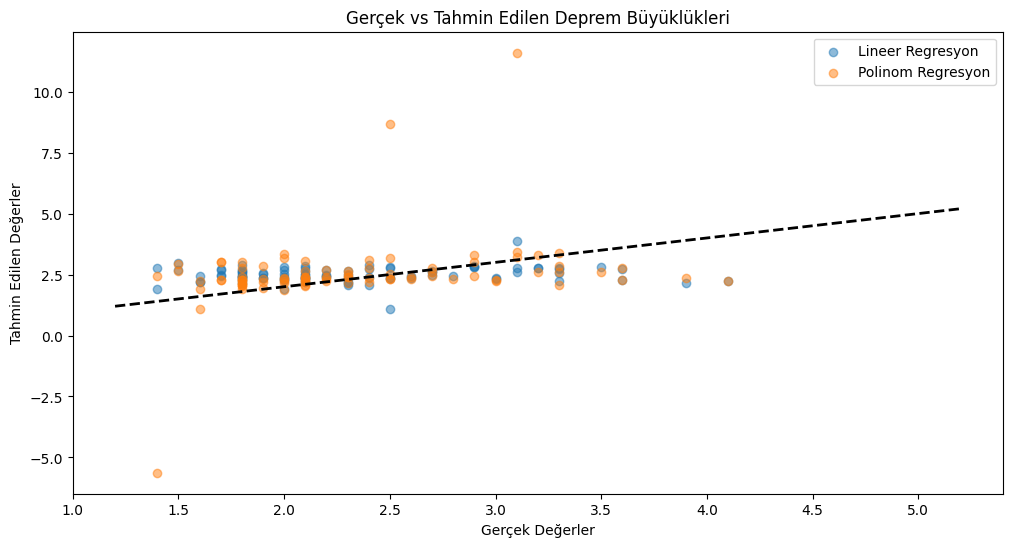

In [147]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Lineer Regresyon')
plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Polinom Regresyon')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Deprem Büyüklükleri')
plt.legend()
plt.show()

In [148]:
import joblib

In [149]:
joblib.dump(model, 'deprem_lineer_model.pkl')
joblib.dump(model_poly, 'deprem_polinom_model.pkl')

['deprem_polinom_model.pkl']

In [150]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Katsayı'])
print("\nLineer Model Katsayıları:")
print(coeff_df)


Lineer Model Katsayıları:
                  Katsayı
Enlem           -0.401544
Boylam          -0.044745
Derinlik_km      0.013337
Saat            -0.045076
Gun             -0.918409
Ana_Yer_MARMARA  0.868730
